In [1]:
import pandas as pd
from pprint import pprint
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.ticker as mticker

# Load dataset
data = pd.read_json("dataset.35past.Linux10k.json")

In [5]:
# KDE

# Requires seaborn 0.11
print(sn.__version__)

# Dropping failures, keeping only one test per build
tests = data.drop_duplicates(subset=['buildId', 'testId'])

tests.rename(columns={'flakeRate':'Flake rate'}, inplace=True)
tests.label = tests.label.replace(0, "Flaky tests")
tests.label = tests.label.replace(1, "Fault-revealing tests")

p = sn.kdeplot(data=tests, x="Flake rate", hue="label", palette=['red',"orange"], common_norm=False, shade=True, fill=True)
lss = [':', '--']

handles = p.legend_.legendHandles[::-1]

for line, ls, handle in zip(p.collections, lss, handles):
    line.set_linestyle(ls)
    handle.set_ls(ls)
plt.show()

0.10.1


In [6]:
count = tests.groupby("buildId")["label"].value_counts().unstack(fill_value=0).stack().rename('Number of tests').reset_index()
count["label"] = count["label"].replace(0,"Flaky")
count["label"] = count["label"].replace(1,"Failing")
count[count["label"] == "Flaky"].describe()

,buildId,Number of tests
count,9926.000000,9926.000000
mean,118042.852408,178.275035
std,2870.147106,41.678340
min,113075.000000,2.000000
25%,115558.250000,152.000000
50%,118041.500000,171.000000
75%,120523.750000,200.000000
max,123038.000000,568.000000


In [7]:
# Create dataframe with count
pd.set_option('display.max_rows', 2500)
tests = data.drop_duplicates(subset=['buildId', 'testId'])
flaky = tests[tests["testStatus"] == "FLAKY"]
failing = tests[tests["testStatus"] == "UNEXPECTED"]
countFlaky = flaky.groupby("buildId")["label"].value_counts().rename('Number of tests per build').reset_index()
countFailing = failing.groupby("buildId")["label"].value_counts().rename('Number of tests per build').reset_index()

# Rename label
countFlaky["label"] = countFlaky["label"].replace(0,"Flaky")
countFailing["label"] = countFailing["label"].replace(1,"Fault-revealing")

# Print
print(countFailing.describe())
print(countFlaky.describe())

# countFlaky = count[count["label"] == "Flaky"]
# countFailing = count[count["label"] == "Failing"]
# print(countFailing.head(n=1000))
# print(countFlaky.head(n=100))

             buildId  Number of tests per build
count    2415.000000                2415.000000
mean   118576.089855                   2.705590
std      2791.800652                  14.862079
min    113075.000000                   1.000000
25%    116465.500000                   1.000000
50%    118629.000000                   1.000000
75%    121011.000000                   2.000000
max    123035.000000                 579.000000
             buildId  Number of tests per build
count    9926.000000                9926.000000
mean   118042.852408                 178.275035
std      2870.147106                  41.678340
min    113075.000000                   2.000000
25%    115558.250000                 152.000000
50%    118041.500000                 171.000000
75%    120523.750000                 200.000000
max    123038.000000                 568.000000


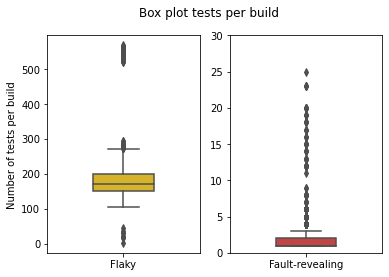

In [8]:
# plt.figure(figsize=(15,4))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Box plot tests per build')

sn.boxplot(data=countFlaky, x="label", y="Number of tests per build", width=0.4, palette=["#f1c40f"], ax=ax[0])
sn.boxplot(data=countFailing, x="label", y="Number of tests per build", width=0.4, palette=["#d63031"], ax=ax[1])
ax[0].set(xlabel=None)
ax[1].set(xlabel=None)
ax[1].set(ylabel=None)

# Show plot
plt.ylim(0, 30)
plt.savefig('sample.png', dpi=150, bbox_inches='tight')
plt.show()